In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [2]:
file = 'sensor_readings_24.data'
data = pd.read_csv(file, header=None)
data_no_label = data.iloc[:, :-1]
labels = data.iloc[:, -1]
print(data.shape)
#print(labels)
data.head()

(5456, 25)


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.438,0.498,3.625,3.645,5.0,2.918,5.0,2.351,2.332,2.643,...,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429,Slight-Right-Turn
1,0.438,0.498,3.625,3.648,5.0,2.918,5.0,2.637,2.332,2.649,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.443,0.429,Slight-Right-Turn
2,0.438,0.498,3.625,3.629,5.0,2.918,5.0,2.637,2.334,2.643,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.446,0.429,Slight-Right-Turn
3,0.437,0.501,3.625,3.626,5.0,2.918,5.0,2.353,2.334,2.642,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.444,0.429,Slight-Right-Turn
4,0.438,0.498,3.626,3.629,5.0,2.918,5.0,2.640,2.334,2.639,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.441,0.429,Slight-Right-Turn


# QUESTÃO 1: Usando o conjunto original para 24 sensores de ultrassom. Pede-se:

### 1.1. Identificar para o problema em questão o número de classes, o número de instâncias/exemplos de cada classe, e a dimensão do vetor de atributos.

In [3]:
label = data.iloc[:, -1]
classes = label.value_counts()
classes

24
Move-Forward         2205
Sharp-Right-Turn     2097
Slight-Right-Turn     826
Slight-Left-Turn      328
Name: count, dtype: int64

### 1.2. Verificar se as matrizes de covariância das classes são invertíveis ou não.

In [4]:
cov = np.cov(data_no_label, rowvar=False)
print(cov.shape)

rank = np.linalg.matrix_rank(cov)
print("O posto da matriz é:", rank)

(24, 24)
O posto da matriz é: 24


### 1.3. Implementar e avaliar os seguintes 4 classificadores: classificador quadrático gaussiano (CQG), Variante 2 (CQG-V2), Variante 4 (CQG-V4) e Classificador Linear de Mínimos Quadrados (CLMQ). Preencher a tabela abaixo após Nr = 100 rodadas de treinamento/teste. Comente os resultados obtidos.

# QUESTÃO 2: Aplicar PCA ao conjunto original de 24 sensores. Pede-se:

### 2.1. Determinar o número de componentes (q) adequado para o problema, ou seja, que promova uma redução de dimensão dos vetores de atributo sem piorar o desempenho dos classificadores implementados. Mostre o gráfico da variância explicada VE(q).

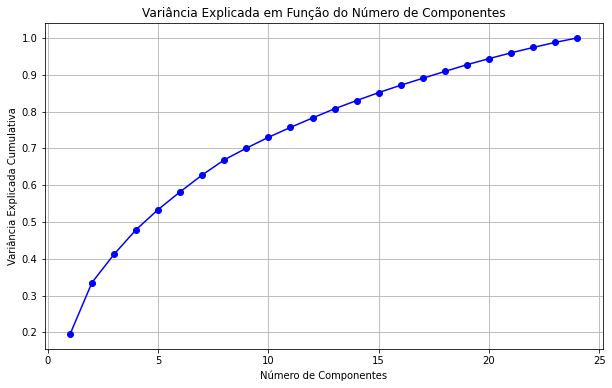

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data_no_label, labels, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

# Aplicar PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)

# Determinar o número adequado de componentes
variance_explained = np.cumsum(pca.explained_variance_ratio_)

# Plotar a variância explicada em função do número de componentes
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(variance_explained) + 1), variance_explained, marker='o', linestyle='-', color='b')
plt.title('Variância Explicada em Função do Número de Componentes')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Cumulativa')
plt.grid(True)
plt.show()